In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datasets


import seaborn
seaborn.set_context("paper", font_scale=1.9)
# seaborn.set_style("whitegrid")

In [2]:
data ={}
data["Trained on corrupted negatives"] = datasets.load_dataset("json", data_files="../../outputs/dataset_embeddings/from_all/webnlg_inverted_rdfs_len_1.jsonl", split="train")
data["Trained on corrupted and inverted negatives"] = datasets.load_dataset("json", data_files="../../outputs/dataset_embeddings/allneg_alldatasets_bs160/webnlg_inverted_rdfs_len_1.jsonl", split="train")

Using custom data configuration default-52b77304fac2af8a
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-52b77304fac2af8a/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-d5da841671eb78be
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-d5da841671eb78be/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


In [3]:
def compute_difference(example):
    example["difference"] = example["similarity"] - example["similarity_inverted"]
    return example

In [4]:
SYMMETRICAL_RELATIONSHIPS = [
    "taxon synonym",
    "partner in business or sport",
    "opposite of",
    "partially coincident with",
    "physically interacts with",
    "partner",
    "relative",
    "related category",
    "connects with",
    "twinned administrative body",
    "different from",
    "said to be the same as",
    "sibling",
    "adjacent station",
    "shares border with",
]

In [5]:
data["Trained on corrupted negatives"] = data["Trained on corrupted negatives"].filter(lambda x: x["triples"][0][1] not in SYMMETRICAL_RELATIONSHIPS).map(compute_difference)
data["Trained on corrupted and inverted negatives"] = data["Trained on corrupted and inverted negatives"].filter(lambda x: x["triples"][0][1] not in SYMMETRICAL_RELATIONSHIPS).map(compute_difference)

Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/json/default-52b77304fac2af8a/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b/cache-8b4af14e21628f58.arrow
Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/json/default-52b77304fac2af8a/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b/cache-bd6e4a1110bc0193.arrow
Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/json/default-d5da841671eb78be/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b/cache-8d7b55772eabc091.arrow
Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/json/default-d5da841671eb78be/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b/cache-f3123c378b266682.arrow


In [6]:
def difference_plot(dataset_name, axes, sanity=False, upper_bound=30):
    ax = axes[dataset_name]
    if sanity:
        plot_data = sanity_data
    else:
        plot_data = data
    avg = np.mean(plot_data[dataset_name]["difference"])
    ax.axvline(0, color="black", alpha=1)
    ax.axvline(avg, color="black", alpha=1, ls=':', label=f"Average difference: {avg:.3f}")
    ax.hist(plot_data[dataset_name]["difference"], color = "#ffbe33", bins = 125, density=True, alpha=1)
    ax.set_ylim([0, upper_bound])
    ax.set_xlim([-0.3, 0.6])
    ax.set_title(dataset_name, fontsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)   
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)      
    xticks = ax.get_xticks()
    ax.tick_params(axis=u'both', which=u'both',length=0, labelsize=15)
    for x_pos in xticks:
        ax.axvline(x_pos, color="black", alpha=0.15)
    ax.set_xlabel('Difference in similarity', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.legend(fontsize=13)
#     plt.text(avg, upper_bound / 2, f"avg. difference: {avg}", rotation=90, verticalalignment='center')
    ax.set_yticklabels([])
    carac_length = ax.get_xticks()[-1]
    ax.arrow(-carac_length / 50, upper_bound/2, -carac_length / 3, 0, head_width=0.5, head_length=carac_length / 50, color='black', length_includes_head=True)
    ax.arrow(carac_length / 50, upper_bound/2, carac_length / 3, 0, head_width=0.5, head_length=carac_length / 50, color='black', length_includes_head=True)
    ax.text(carac_length / 50, upper_bound / 1.92, "Original higher", horizontalalignment="left", fontsize=15)
    ax.text(- carac_length / 50, upper_bound / 1.92, "Inverted higher", horizontalalignment="right", fontsize=15)

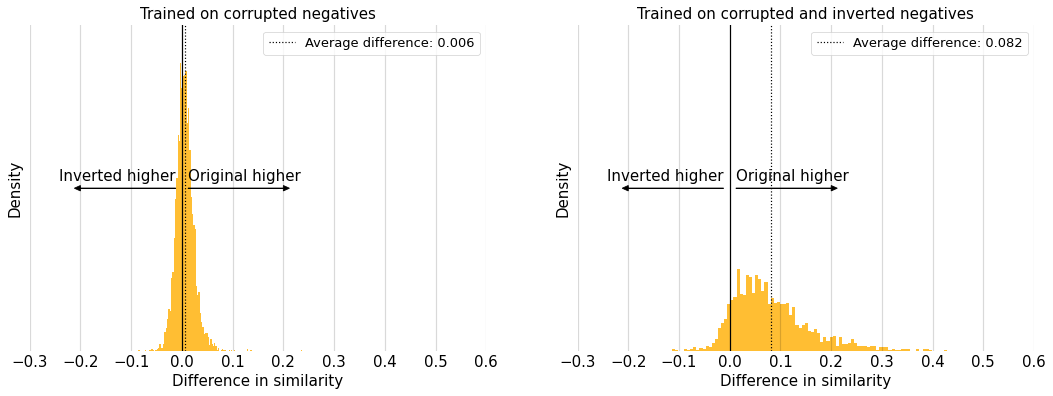

In [7]:
train_axes = {}
fig, (train_axes["Trained on corrupted negatives"], train_axes["Trained on corrupted and inverted negatives"]) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for name in ["Trained on corrupted negatives", "Trained on corrupted and inverted negatives"]:
    difference_plot(name, train_axes, sanity=False)
# fig.suptitle('Predicate-argument inversion detection power', fontsize=21)